## Linear Regression

w should be something around [2]:  [ 2.00981951]
b should be something around [10]: [ 9.98865509]


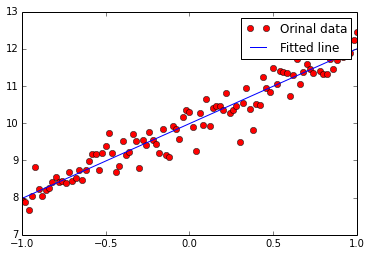

In [1]:
#!/usr/bin/env python
# h(X)= b + wX
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def model(X, w, b):
    return tf.mul(X, w) + b


trX = np.linspace(-1, 1, 101).astype(np.float32)
# create a y value which is approximately linear but with some random noise
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 + 10

# create a shared variable (like theano.shared) for the weight matrix
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
cost = tf.reduce_mean(tf.square(trY-model(trX, w, b)))

# construct an optimizer to minimize cost and fit line to my data
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize variables (in this case just variable W)
    tf.initialize_all_variables().run()

    for i in range(1000):
        sess.run(train_op)

    print "w should be something around [2]: ", sess.run(w)
    print "b should be something around [10]:", sess.run(b)
    
    plt.plot(trX, trY, "ro", label="Orinal data")
    plt.plot(trX, w.eval()*trX + b.eval(), label="Fitted line")
    plt.legend()
    plt.show()


## Multi-variable Linear Regression

In [4]:
#!/usr/bin/env python
# h(X)= B + WX
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def model(X, w, b):
    return tf.mul(w, X) + b

trX = np.mgrid[-1:1:0.01, -10:10:0.1].reshape(2, -1).T
trW = np.array([3, 5])
trY = trW*trX + np.random.randn(*trX.shape) + [20, 100]

w = tf.Variable(np.array([1., 1.]).astype(np.float32))
b = tf.Variable(np.array([[1., 1.]]).astype(np.float32))
cost = tf.reduce_mean(tf.square(trY-model(trX, w, b))) 

# construct an optimizer to minimize cost and fit line to my data
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize variables (in this case just variable W)
    tf.initialize_all_variables().run()

    for i in range(1000):
        if i % 99 == 0:
            print "Cost at step", i, "is:", cost.eval()
        sess.run(train_op)

    print "w should be something around [3, 5]: ", sess.run(w)
    print "b should be something around [20,100]:", sess.run(b)


Cost at step 0 is: 5329.87
Cost at step 99 is: 1.22204
Cost at step 198 is: 0.998043
Cost at step 297 is: 0.997083
Cost at step 396 is: 0.997049
Cost at step 495 is: 0.997049
Cost at step 594 is: 0.997049
Cost at step 693 is: 0.997049
Cost at step 792 is: 0.997049
Cost at step 891 is: 0.997049
Cost at step 990 is: 0.997049
w should be something around [3, 5]:  [ 3.00108743  5.00054932]
b should be something around [20,100]: [[  20.00317383  100.00382233]]
